In [ ]:
https://github.com/Call-for-Code/Spot-Challenge-Wildfires/blob/main/data/Readme_Docs_Wildfires-Datasets_2020-11.pdf 
https://github.com/Call-for-Code/Spot-Challenge-Wildfires 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [2]:
df_wf = pd.read_csv('../../../eismas/Jan_30/Historical_Wildfires.csv')
df_hw = pd.read_csv('../../../eismas/Jan_30/HistoricalWeather.csv')
df_hwf = pd.read_csv('../../../eismas/Jan_30/HistoricalWeatherForecasts.csv')
df_vi = pd.read_csv('../../../eismas/Jan_30/VegetationIndex.csv')

In [8]:
df_wf.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


In [9]:
df_hw.head(2)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937


In [10]:
df_hwf.head()

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [11]:
df_vi.head(2)

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,2005-01-01,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2005-02-01,0.357403,0.9772,-0.2,0.208673,0.043544


In [7]:
df_wf['Date'] = pd.to_datetime(df_wf['Date'])
df_hw['Date'] = pd.to_datetime(df_hw['Date'])
df_hwf['Date'] = pd.to_datetime(df_hwf['Date'])
df_vi['Date'] = pd.to_datetime(df_vi['Date'])


In [12]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

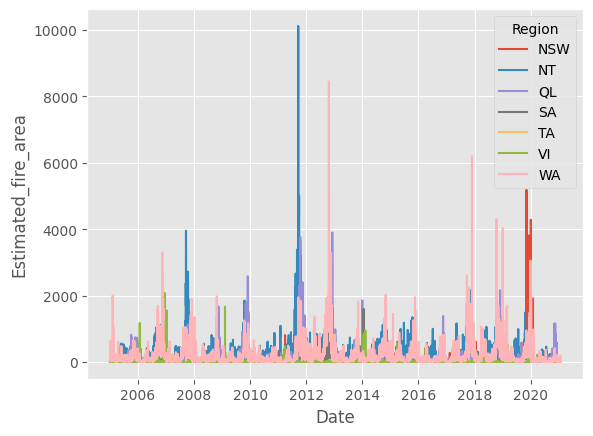

In [15]:
sns.lineplot(data=df_wf, x='Date', y='Estimated_fire_area', hue='Region')
plt.show()